In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
if not os.path.isfile("jena_climate_2009_2016.csv"):
    !wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
    !unzip jena_climate_2009_2016.csv.zip
    !rm jena_climate_2009_2016.csv.zip

In [3]:
df = pd.read_csv("jena_climate_2009_2016.csv")
# slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [4]:
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [5]:
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

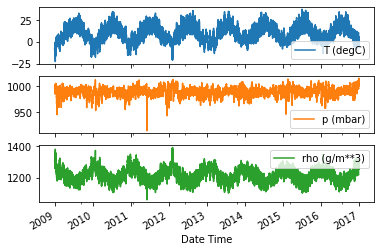

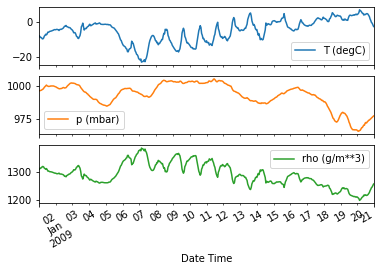

In [6]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [8]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame
df['wv (m/s)'].min()

0.0

Text(0, 0.5, 'Wind Velocity [m/s]')

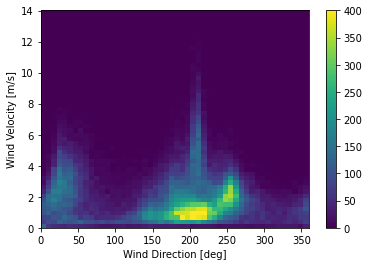

In [9]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [10]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

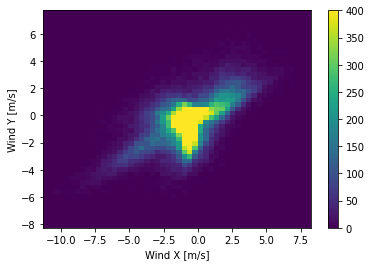

In [11]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [12]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [13]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

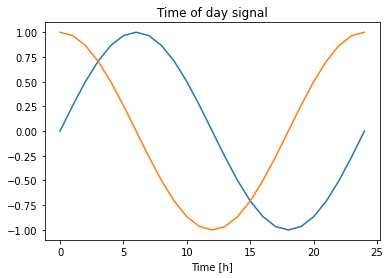

In [14]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')


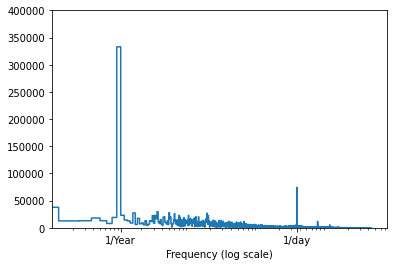

In [15]:
fft = np.fft.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')


In [16]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [17]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

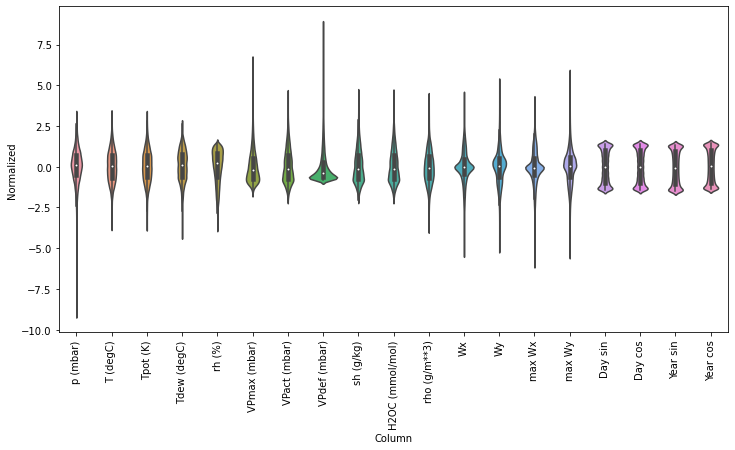

In [18]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)


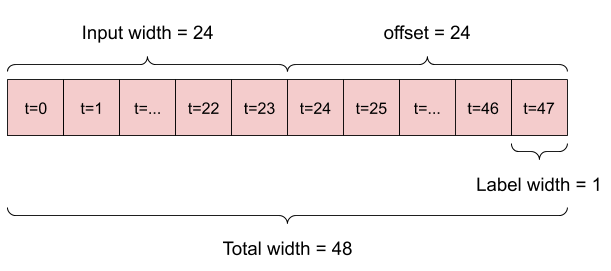 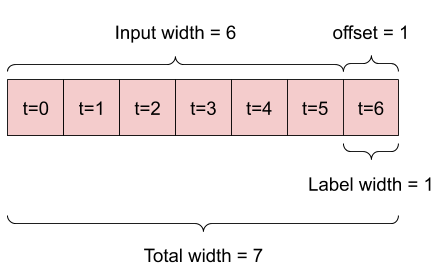


## End of data exploration

---

In [20]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

In [293]:
class WindowDataset(Dataset):
    """"""
    def __init__(self, dataframe, label_columns, input_width, label_width, shift):
        self.y = dataframe[label_columns]
        self.x = dataframe
            
        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __len__(self):
        return len(self.y) // self.total_window_size
    
    def __getitem__(self, idx):
        return (
            self.x.iloc[self.input_indices + self.total_window_size*idx].values, 
            self.y.iloc[self.label_indices + self.total_window_size*idx].values,
        )
    
    def __repr__(self):
        # TODO: debug only
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.y.columns.values}'])


In [294]:
train_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
0,0.947798,-1.979098,-2.039664,-1.935911,1.050661,-1.303075,-1.484198,-0.784475,-1.487252,-1.489470,2.215821,-0.158358,0.559762,-0.188578,0.583578,-0.306049,1.380697,-0.063252,1.428470
1,0.953824,-2.024163,-2.084367,-1.990409,1.056701,-1.316074,-1.505583,-0.786551,-1.505967,-1.510594,2.265873,0.037168,0.572881,-0.038475,0.670142,-0.245530,1.392733,-0.063082,1.428469
2,0.949003,-2.035718,-2.095830,-1.994711,1.086899,-1.318674,-1.507959,-0.788628,-1.509710,-1.512941,2.276616,0.201699,0.270573,0.108096,0.308017,-0.184542,1.402119,-0.062911,1.428467
3,0.946592,-2.012608,-2.071759,-1.960292,1.105018,-1.312174,-1.493702,-0.790705,-1.494738,-1.498858,2.250980,0.134363,0.185412,0.155410,0.213848,-0.123204,1.408836,-0.062741,1.428466
4,0.946592,-2.007986,-2.068320,-1.955989,1.098979,-1.310874,-1.491326,-0.790705,-1.494738,-1.496511,2.246341,0.163709,0.137156,0.141024,0.137260,-0.061631,1.412871,-0.062570,1.428464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294380,0.183649,0.631182,0.612743,1.312433,1.141257,0.423229,1.519095,-0.651568,1.510995,1.510143,-0.619604,-0.257772,-0.662969,-0.195988,-0.498716,-0.123204,1.408836,-0.857501,-1.153288
294381,0.211370,0.626560,0.605866,1.325340,1.189574,0.418030,1.540479,-0.678564,1.533454,1.531267,-0.609838,-0.267899,-0.627865,-0.279056,-0.575957,-0.061631,1.412871,-0.857644,-1.153196
294382,0.224628,0.609228,0.587526,1.308130,1.201654,0.397231,1.511967,-0.686871,1.503509,1.503102,-0.590061,-0.150338,-1.291684,-0.062958,-0.915710,0.000060,1.414217,-0.857787,-1.153104
294383,0.213781,0.618472,0.597842,1.321038,1.207693,0.407630,1.535727,-0.688948,1.525968,1.526573,-0.601781,0.072008,-0.638019,0.089168,-0.534041,0.061750,1.412871,-0.857929,-1.153012


In [295]:
val_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
294385,0.208960,0.576874,0.556577,1.267974,1.201654,0.358233,1.445438,-0.688948,1.436133,1.437382,-0.562227,-0.203397,-0.267740,-0.269791,-0.284806,0.184662,1.402119,-0.858215,-1.152828
294386,0.211370,0.561852,0.541676,1.256501,1.219773,0.341334,1.424054,-0.701408,1.417417,1.416258,-0.547577,-0.143431,-0.548834,-0.091092,-0.401308,0.245649,1.392733,-0.858357,-1.152736
294387,0.221012,0.536431,0.516459,1.229252,1.231852,0.311436,1.381286,-0.709715,1.372499,1.371663,-0.520720,-0.089618,-0.248541,-0.169923,-0.302709,0.306169,1.380697,-0.858500,-1.152644
294388,0.239092,0.530653,0.508435,1.233555,1.262051,0.304936,1.388414,-0.726328,1.379986,1.378705,-0.511442,-0.158367,-0.436713,-0.230929,-0.484539,0.366105,1.366032,-0.858642,-1.152552
294389,0.241502,0.545675,0.523336,1.260804,1.286209,0.321835,1.433558,-0.738788,1.424903,1.423300,-0.526335,0.071741,-0.232377,0.078781,-0.186937,0.425346,1.348767,-0.858785,-1.152460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378490,1.586597,-0.726533,-0.844132,-0.475949,0.827192,-0.763605,-0.631206,-0.668181,-0.652534,-0.651550,1.083653,1.367957,1.160258,1.274534,1.029295,-1.380708,0.306161,1.262219,0.512437
378491,1.599855,-0.728844,-0.846424,-0.480251,0.821153,-0.764905,-0.633582,-0.668181,-0.656277,-0.653897,1.089268,1.625236,1.109979,1.559779,1.019206,-1.366042,0.366091,1.262279,0.512280
378492,1.616729,-0.724222,-0.844132,-0.483120,0.796994,-0.762305,-0.635958,-0.659874,-0.660020,-0.658591,1.089513,1.391192,1.100475,1.321291,0.997932,-1.348775,0.425324,1.262338,0.512122
378493,1.625166,-0.721911,-0.841840,-0.488856,0.772835,-0.759705,-0.640710,-0.653644,-0.663763,-0.663285,1.089513,1.339405,1.098931,1.308444,1.022876,-1.328940,0.483748,1.262397,0.511965


In [296]:
BATCH_SIZE = 4

train_ds = WindowDataset(
    dataframe=train_df, label_columns=['T (degC)'],
    input_width=1, label_width=1, shift=1
)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)

val_ds = WindowDataset(
    dataframe=val_df, label_columns=['T (degC)'],
    input_width=1, label_width=1, shift=1
)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

In [297]:
train_ds

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [25]:
for (inputs, label) in tqdm(train_loader):
    pass

100%|██████████| 6133/6133 [00:09<00:00, 663.69it/s]


In [26]:
for (inputs, label) in train_loader:
    print(inputs.shape, label.shape)
    break

torch.Size([4, 1, 19]) torch.Size([4, 1, 1])


## Single step models

In [27]:
loss = nn.MSELoss()

### Baseline

In [28]:
class Baseline(nn.Module):
    def __init__(self):
        super(Baseline, self).__init__()
        
    def forward(self, x):
        return x[:, -1, 1].reshape((x.shape[0], -1, 1))

In [29]:
baseline = Baseline()

In [30]:
for (inputs, label) in train_loader:
    out = baseline(inputs)
    print(out)
    break

tensor([[[-1.9825]],

        [[-2.0703]],

        [[-2.1650]],

        [[-2.1119]]], dtype=torch.float64)


In [31]:
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = baseline(inputs)
        running_loss += loss(out, label)  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

Loss 0.01313: 100%|██████████| 1753/1753 [00:02<00:00, 600.18it/s]


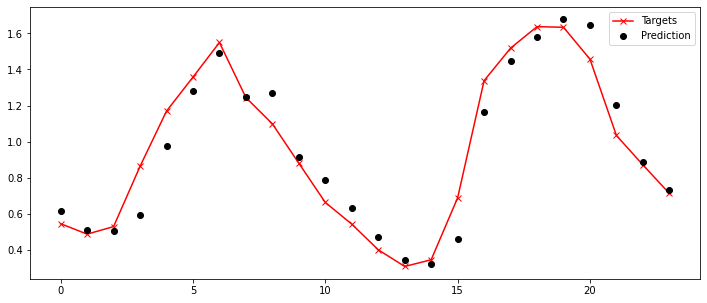

In [32]:
targets = []
outputs = []

for i in range(24):
    targets.append(float(val_ds[i][1].squeeze()))
    outputs.append(baseline(val_ds[i][0][None, :]).squeeze())

plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

### Linear model

In [33]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.dense = nn.Linear(19, 1)
        
    def forward(self, x):
        return self.dense(x)

linear = Linear()

In [34]:
for (inputs, label) in train_loader:
    out = linear(inputs.float())
    print(out)
    break

tensor([[[-1.5101]],

        [[-1.3933]],

        [[-1.2893]],

        [[-0.9968]]], grad_fn=<AddBackward0>)


  0%|          | 0/6133 [00:00<?, ?it/s]/home/khazit/Documents/ML/BatteryProbe.ai/.venv/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag
Epoch #3 - Loss = 0.00904: 100%|██████████| 6133/6133 [00:13<00:00, 449.46it/s]


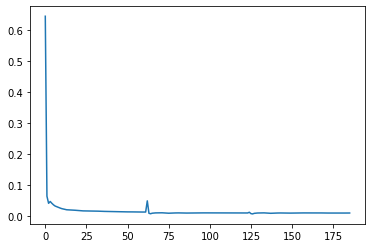

In [35]:
N_EPOCHS = 3

criterion = nn.MSELoss()
optimizer = optim.SGD(linear.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = linear(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

In [36]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = linear(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

Loss 0.01038: 100%|██████████| 1753/1753 [00:03<00:00, 554.29it/s]


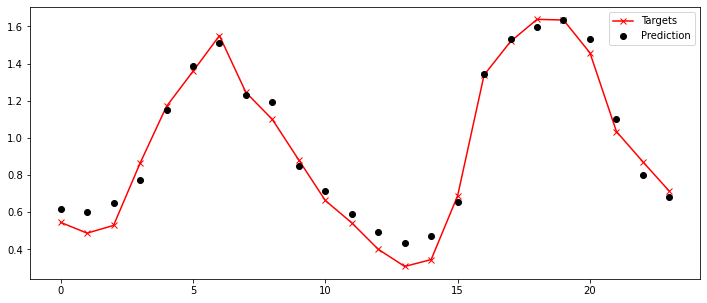

In [37]:
targets = []
outputs = []
for i in range(24):
    outputs.append(linear(torch.Tensor(val_ds[i][0])))
    targets.append(val_ds[i][1].squeeze())

plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

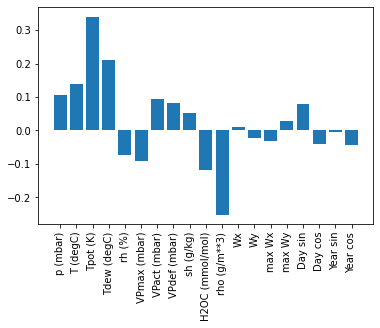

In [38]:
plt.bar(x = range(len(train_df.columns)),
        height=list(linear.parameters())[0].data.squeeze().numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

> Sometimes the model doesn't even place the most weight on the input T (degC). This is one of the risks of random initialization. 

### Dense

In [39]:
class Dense(nn.Module):
    def __init__(self):
        super(Dense, self).__init__()
        self.dense1 = nn.Linear(19, 64)
        self.dense2 = nn.Linear(64, 64)
        self.dense3 = nn.Linear(64, 1)
        
    def forward(self, x):
        res = self.dense1(x)
        res = F.relu(res)
        res = self.dense2(res)
        res = F.relu(res)
        return self.dense3(res)

dense = Dense()

for (inputs, label) in train_loader:
    out = dense(inputs.float())
    print(out)
    break

tensor([[[0.1617]],

        [[0.1688]],

        [[0.1623]],

        [[0.1288]]], grad_fn=<AddBackward0>)


Epoch #10 - Loss = 0.00714: 100%|██████████| 6133/6133 [00:17<00:00, 358.64it/s]


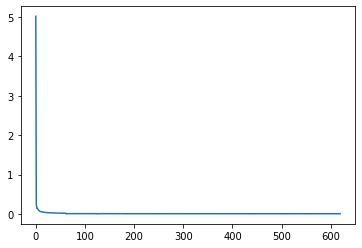

In [40]:
N_EPOCHS = 10

criterion = nn.MSELoss()
optimizer = optim.SGD(dense.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = dense(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

In [41]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = dense(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

Loss 0.00728: 100%|██████████| 1753/1753 [00:03<00:00, 524.42it/s]


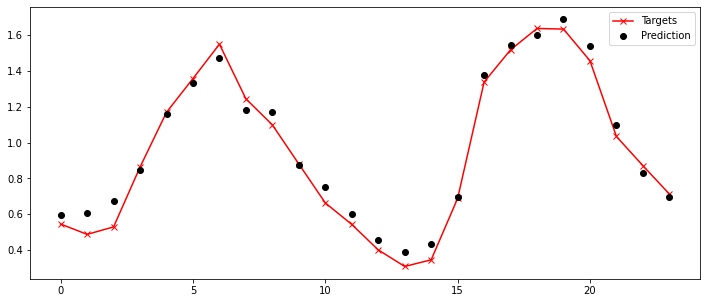

In [42]:
targets = []
outputs = []
for i in range(24):
    outputs.append(dense(torch.Tensor(val_ds[i][0])))
    targets.append(val_ds[i][1].squeeze())

plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

### Multi-step dense (Peut être pas bon ?)

In [32]:
BATCH_SIZE = 32
N_TIMESTEPS = 5

train_ds = WindowDataset(
    dataframe=train_df, label_columns=['T (degC)'],
    input_width=N_TIMESTEPS, label_width=1, shift=1
)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)

val_ds = WindowDataset(
    dataframe=val_df, label_columns=['T (degC)'],
    input_width=N_TIMESTEPS, label_width=1, shift=1
)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

In [33]:
for (inputs, label) in train_loader:
    print(inputs.shape, label.shape)
    break

torch.Size([32, 5, 19]) torch.Size([32, 1, 1])


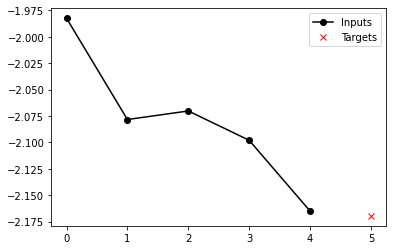

In [34]:
plt.plot(np.arange(0, N_TIMESTEPS, 1), train_ds[0][0][:, 1], "ko-", label="Inputs")
plt.plot(N_TIMESTEPS, train_ds[0][1], "rx", label="Targets")
plt.legend()
plt.show()

In [46]:
class MultiDense(nn.Module):
    def __init__(self, n_timesteps):
        super(MultiDense, self).__init__()
        self.dense1 = nn.Linear(19*n_timesteps, 32)
        self.dense2 = nn.Linear(32, 32)
        self.dense3 = nn.Linear(32, 1)
        
    def forward(self, x):
        res = x.reshape((x.shape[0], -1))
        res = self.dense1(res)
        res = F.relu(res)
        res = self.dense2(res)
        res = F.relu(res)
        return self.dense3(res)[:, None]

multidense = MultiDense(N_TIMESTEPS)

for (inputs, label) in train_loader:
    out = multidense(inputs.float())
    print(out[:4])
    break

tensor([[[-0.0786]],

        [[-0.0962]],

        [[-0.0636]],

        [[-0.0252]]], grad_fn=<SliceBackward>)


Epoch #5 - Loss = 0.01724: 100%|██████████| 256/256 [00:02<00:00, 97.06it/s] 


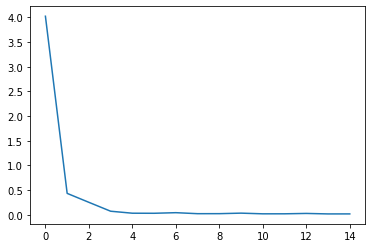

In [47]:
N_EPOCHS = 5

criterion = nn.MSELoss()
optimizer = optim.SGD(multidense.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = multidense(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

Loss 0.01020: 100%|██████████| 73/73 [00:00<00:00, 99.10it/s]


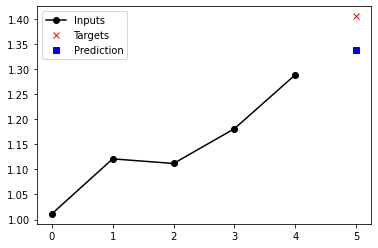

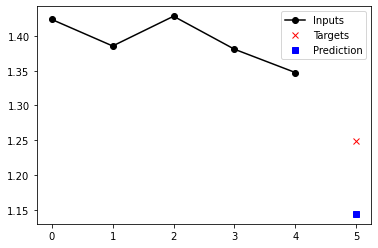

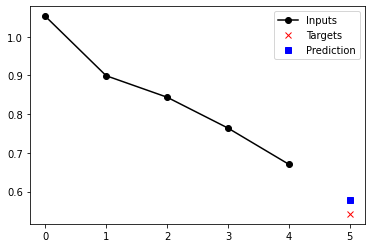

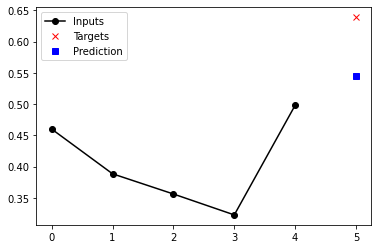

In [48]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = multidense(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

for i in range(25, 29):
    out = multidense(torch.Tensor(val_ds[i][0])[None, :]).detach().numpy().squeeze()
    plt.plot(np.arange(0, N_TIMESTEPS, 1), val_ds[i][0][:, 1], "ko-", label="Inputs")
    plt.plot(N_TIMESTEPS, val_ds[i][1], "rx", label="Targets")
    plt.plot(N_TIMESTEPS, out, "bs", label="Prediction")
    plt.legend()
    plt.show()

### CNN 

In [49]:
class Conv(nn.Module):
    def __init__(self, n_timesteps):
        super(Conv, self).__init__()
        self.conv = nn.Conv1d(19, 32, (N_TIMESTEPS,))
        self.dense1 = nn.Linear(32, 32)
        self.dense2 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = x.permute(0, 2, 1)
        res = self.conv(x).squeeze()
        res = F.relu(res)
        res = self.dense1(res)
        res = F.relu(res)
        return self.dense2(res)[:, None]

conv = Conv(N_TIMESTEPS)

for (inputs, label) in train_loader:
    out = conv(inputs.float())
    print(out[:4])
    break

tensor([[[-0.0280]],

        [[ 0.0391]],

        [[-0.0672]],

        [[-0.0621]]], grad_fn=<SliceBackward>)


Epoch #10 - Loss = 0.01218: 100%|██████████| 256/256 [00:03<00:00, 82.81it/s]


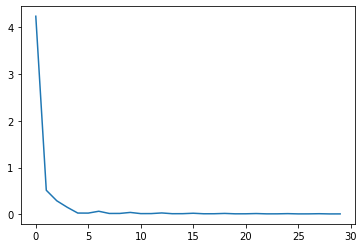

In [50]:
N_EPOCHS = 10

criterion = nn.MSELoss()
optimizer = optim.SGD(conv.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = conv(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

Loss 0.00614: 100%|██████████| 73/73 [00:00<00:00, 90.96it/s]


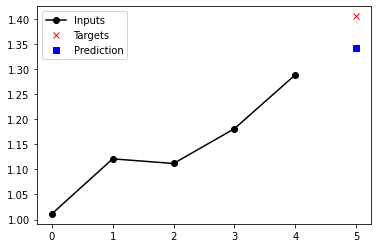

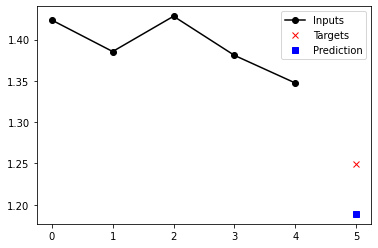

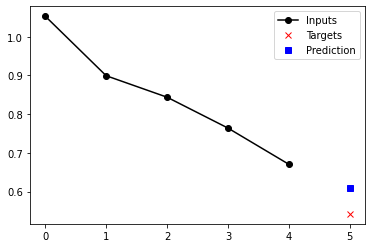

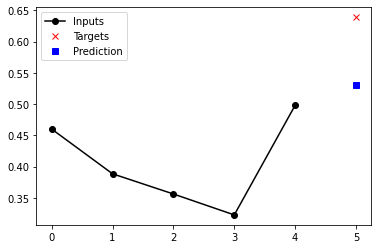

In [51]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = conv(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

for i in range(25, 29):
    out = conv(torch.Tensor(val_ds[i][0])[None, :]).detach().numpy().squeeze()
    plt.plot(np.arange(0, N_TIMESTEPS, 1), val_ds[i][0][:, 1], "ko-", label="Inputs")
    plt.plot(N_TIMESTEPS, val_ds[i][1], "rx", label="Targets")
    plt.plot(N_TIMESTEPS, out, "bs", label="Prediction")
    plt.legend()
    plt.show()

### Recurrent neural network

In [4]:
# from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter('runs/rnn')

In [39]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.lstm = nn.LSTM(19, 24, batch_first=True)  # (batch, seq, feature)
        self.linear = nn.Linear(24, 1)
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        x = self.linear(lstm_out[:, -1])[:, None]
        return x
    
rnn = RNN()

for (inputs, label) in train_loader:
    out = rnn(inputs.float())
    print(out[:4])
    break

tensor([[[0.0401]],

        [[0.0651]],

        [[0.0474]],

        [[0.0700]]], grad_fn=<SliceBackward>)


  0%|          | 0/256 [00:00<?, ?it/s]/home/khazit/Documents/ML/BatteryProbe.ai/.venv/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag
Epoch #10 - Loss = 0.00752: 100%|██████████| 256/256 [00:02<00:00, 86.60it/s]


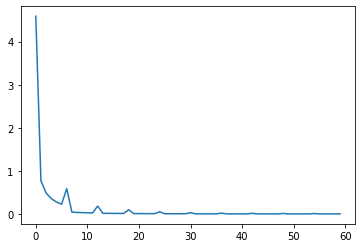

In [40]:
N_EPOCHS = 10

criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=1e-3)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = rnn(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 50):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))
            
plt.plot(history)
plt.show()

Loss 0.00723: 100%|██████████| 73/73 [00:00<00:00, 102.67it/s]


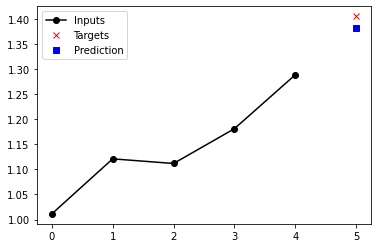

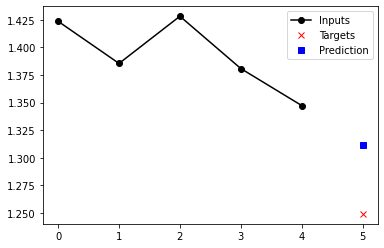

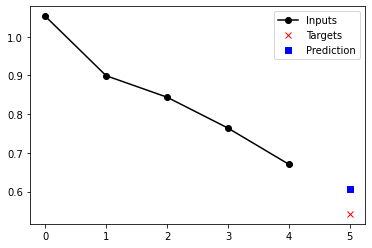

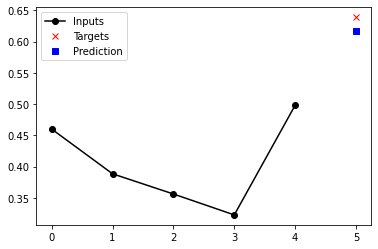

In [42]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = rnn(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

for i in range(25, 29):
    out = rnn(torch.Tensor(val_ds[i][0])[None, :]).detach().numpy().squeeze()
    plt.plot(np.arange(0, N_TIMESTEPS, 1), val_ds[i][0][:, 1], "ko-", label="Inputs")
    plt.plot(N_TIMESTEPS, val_ds[i][1], "rx", label="Targets")
    plt.plot(N_TIMESTEPS, out, "bs", label="Prediction")
    plt.legend()
    plt.show()

### Autoregressive

In [21]:
class WindowDataset(Dataset):
    """"""
    def __init__(self, dataframe, input_width, label_width, shift, label_columns=None):
        self.x = dataframe
        if label_columns is None:
            self.y = dataframe
        else: 
            self.y = dataframe[label_columns]
            
        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __len__(self):
        return len(self.y) // self.total_window_size - 1
    
    def __getitem__(self, idx):
        return (
            self.x.iloc[self.input_indices + self.total_window_size*idx].values, 
            self.y.iloc[self.label_indices + self.total_window_size*idx].values,
        )
    
    def __repr__(self):
        # TODO: debug only
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.y.columns.values}'])

In [22]:
BATCH_SIZE = 32
N_TIMESTEPS = 24
OUT_STEPS = 24

train_ds = WindowDataset(
    dataframe=train_df,
    input_width=N_TIMESTEPS, label_width=OUT_STEPS, shift=OUT_STEPS
)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)

val_ds = WindowDataset(
    dataframe=val_df,
    input_width=N_TIMESTEPS, label_width=OUT_STEPS, shift=OUT_STEPS
)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

In [23]:
train_ds

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): ['p (mbar)' 'T (degC)' 'Tpot (K)' 'Tdew (degC)' 'rh (%)' 'VPmax (mbar)'
 'VPact (mbar)' 'VPdef (mbar)' 'sh (g/kg)' 'H2OC (mmol/mol)'
 'rho (g/m**3)' 'Wx' 'Wy' 'max Wx' 'max Wy' 'Day sin' 'Day cos' 'Year sin'
 'Year cos']

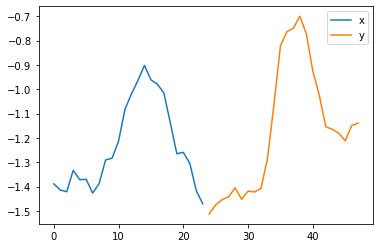

In [24]:
x, y = train_ds[10]
col = 1
plt.plot(np.arange(0, len(x[:, col]), 1), x[:, col], label="x")
plt.plot(np.arange(len(x[:, col]), len(x[:, col])+len(y[:, col]), 1), y[:, col], label="y")
plt.legend()

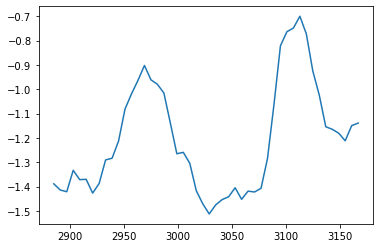

In [25]:
plt.plot(train_df["T (degC)"].iloc[480:528], "-")

In [32]:
class AutoRegressive(nn.Module):
    def __init__(self):
        super(AutoRegressive, self).__init__()
        self.out_steps = OUT_STEPS
        self.lstm = nn.LSTM(19, 32, batch_first=True)
        self.dense = nn.Linear(32, 19)
        
    def forward(self, x):
        predictions = []
        x, state = self.warmup(x)
        predictions.append(x)
        
        for _ in range(1, self.out_steps):
            x, state = self.lstm(x, state)
            x = self.dense(x)
            predictions.append(x)
        
        return torch.cat(predictions, 1)
    
    def warmup(self, x):
        x, state = self.lstm(x)
        x = self.dense(x[:, -1])[:, None, :]
        return x, state
    
auto_reg = AutoRegressive()

for (inputs, label) in train_loader:
    out = auto_reg(inputs.float())
    print(out.shape)
    break

torch.Size([32, 24, 19])


Validation loss = 0.30766	: 100%|██████████| 10/10 [00:00<00:00, 61.00it/s]


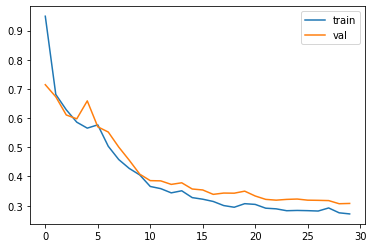

In [33]:
N_EPOCHS = 30

# Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(auto_reg.parameters(), lr=3e-3)

# Useful variables
history = []
val_history = []

# Main loop
for epoch in range(N_EPOCHS):
    # Training
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = auto_reg(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 50):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}\t"
            )
    history.append(running_loss / (i+1))
    
    # Validation
    val_running_loss = 0
    pbar = tqdm(val_loader)
    with torch.no_grad():
        for j, (inputs, label) in enumerate(pbar):
            out = auto_reg(inputs.float())
            val_running_loss += criterion(out, label.float())  # MSE per batch
            pbar.set_description(
                f"Validation loss = {val_running_loss / (j+1):.5f}\t"
            )
    val_history.append(val_running_loss / (j+1))

# Plot training curves
plt.plot(history, label="train")
plt.plot(val_history, label="val")
plt.legend()
plt.show()

In [34]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = auto_reg(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 5):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

Loss 0.32108: 100%|██████████| 10/10 [00:00<00:00, 66.15it/s]


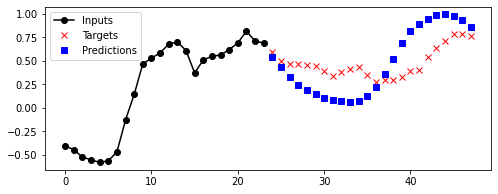

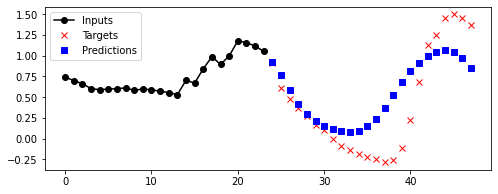

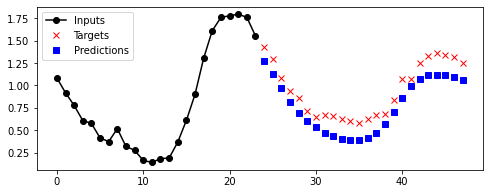

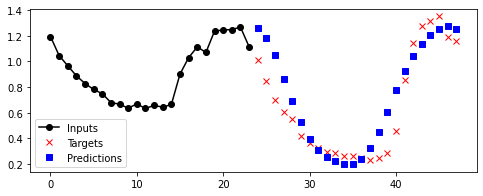

In [35]:
for i in range(25, 29):
    out = auto_reg(torch.Tensor(val_ds[i][0])[None, :]).detach().numpy().squeeze()
    plt.figure(figsize=(8, 3))
    plt.plot(
        np.arange(0, N_TIMESTEPS, 1), 
        val_ds[i][0][:, 1],
        "ko-", label="Inputs"
    )
    plt.plot(
        np.arange(N_TIMESTEPS, N_TIMESTEPS+OUT_STEPS, 1), 
        val_ds[i][1][:, 1], 
        "rx", label="Targets"
    )
    plt.plot(
        np.arange(N_TIMESTEPS, N_TIMESTEPS+OUT_STEPS, 1), 
        out[:, 1], 
        "bs", label="Predictions"
    )
    plt.legend()
    plt.show()

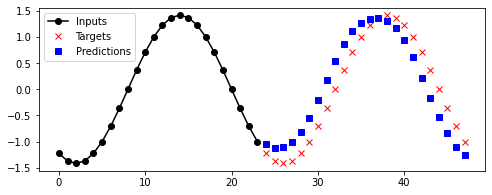

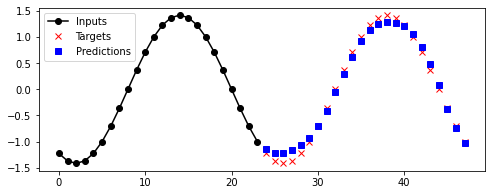

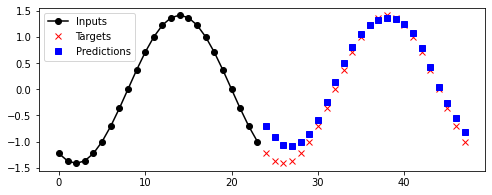

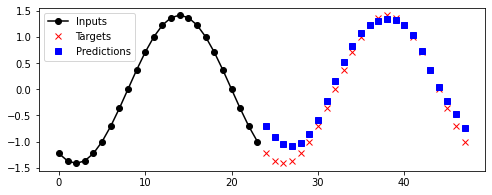

In [46]:
for i in range(26, 30):
    out = auto_reg(torch.Tensor(val_ds[i][0])[None, :]).detach().numpy().squeeze()
    plt.figure(figsize=(8, 3))
    plt.plot(
        np.arange(0, N_TIMESTEPS, 1), 
        val_ds[i][0][:, 15],
        "ko-", label="Inputs"
    )
    plt.plot(
        np.arange(N_TIMESTEPS, N_TIMESTEPS+OUT_STEPS, 1), 
        val_ds[i][1][:, 15], 
        "rx", label="Targets"
    )
    plt.plot(
        np.arange(N_TIMESTEPS, N_TIMESTEPS+OUT_STEPS, 1), 
        out[:, 15], 
        "bs", label="Predictions"
    )
    plt.legend()
    plt.show()